## Linear Regression on Used Car Prices Dataset

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Reading the dataset as a pandas dataframe.

In [3]:
df = pd.read_csv("./used_cars.csv")

### Cleaning the data
Creating a new column that tells the age of the car based on the current year subtracted by it's model_year. Remember cars model years are always one year higher than the year they are sold. Ex: A car sold in 2024 has a model year of 2025.

In [14]:
df = df.assign(age = lambda x: 2025 - x["model_year"])

Removing the dollar sign and the comma from the price column's data.
Removing the mi. and comma from the milage column's data.
Converting the type to integer from object so that the numbers can be used.

In [10]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int)

df['milage'] = df['milage'].str.replace('mi.', '')
df['milage'] = df['milage'].str.replace(',', '')
df['milage'] = df['milage'].astype(int)

Only focusing on one car brand (Ford) as costs vary significant based on the car's manufacturer. Also removing two outliers from the Ford car dataset to make the data more clean. 

In [11]:
df = df[df["brand"] == "Ford"]
df = df[df['price'] <= 110000]

In [66]:
df.shape[0]

384

In [67]:
df.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age
3978,Ford,F-250 Lariat,2011,153818,Diesel,400.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,Gray,Gray,At least 1 accident or damage reported,Yes,29800,14
3981,Ford,Bronco Badlands Advanced,2022,17000,Gasoline,315.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,White,Black,None reported,Yes,69999,3
3983,Ford,EcoSport SES,2019,106000,Gasoline,166.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,12000,6
3990,Ford,F-150 Lariat,2018,65441,Gasoline,325.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,38000,7
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999,5


<Axes: title={'center': 'Price vs Age of Ford Vechicles'}, xlabel='Age (Years)', ylabel='Price ($)'>

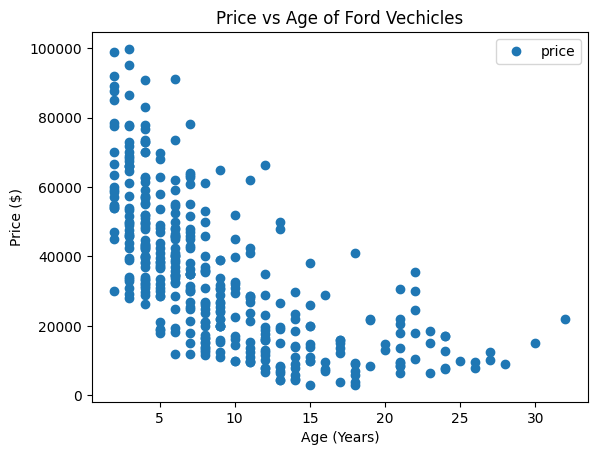

In [12]:
df.plot(x='age', y='price', style='o', title="Price vs Age of Ford Vechicles", ylabel="Price ($)", xlabel="Age (Years)")

### Splitting the data into test and train

In [65]:
X = df[['age']].to_numpy()
y = df[['price']].to_numpy()

# Splitting the dataset into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Changing the shape of the y_train dataset from (n, 1) to (n,) since that is what the SGDRegressor is expecting.
y_train = y_train.flatten()

In [30]:
y_train.shape

(307,)

### Fitting the data
I used the SGDRegressor (SGD stands for Stochastic Gradient Descent) from Scikit learn which is a built-in class in Sci-kit learn that implements gradient descent under the hood and fits a linear model.

In [32]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 31, number of weight updates: 9518.0


Printing out the minimized values for the weight and bias that gradient descent found.

In [52]:
b = sgdr.intercept_
w = sgdr.coef_
print(f"model parameters:                   w: {w}, b:{b}")

model parameters:                   w: [-2645.78340188], b:[54549.07504079]


In [61]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_train)

print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[17508.10741452 28091.24102203 43965.94143328 -3658.15980048]
Target values 
[ 6000 32500 62890 30000]


### Lets plot the predictions!

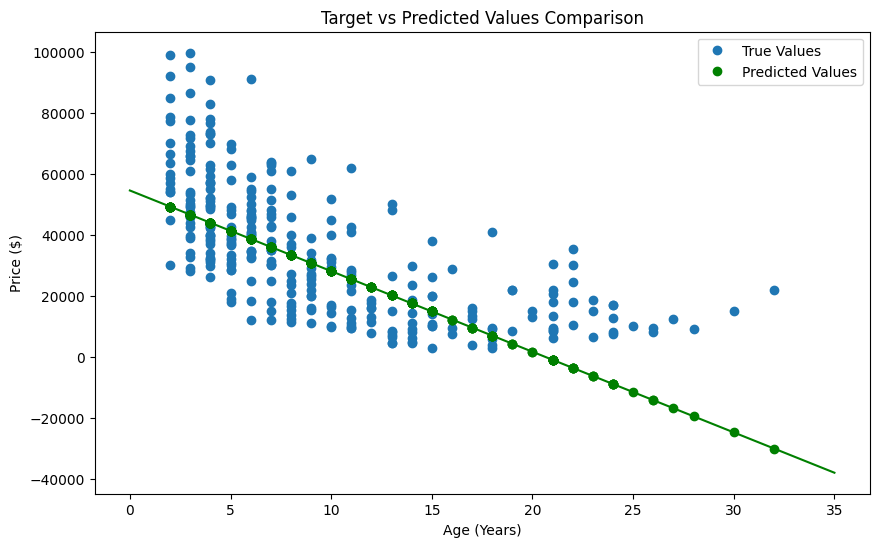

In [64]:
# plot predictions and targets vs original features    
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'o', label='True Values', linewidth=2)
plt.plot(X_train, y_pred_sgd, 'o', label='Predicted Values', color='green', linewidth=2)

x = np.linspace(0, 35, 500)
lin_eq = w * x + b
plt.plot(x, lin_eq, color='green')

# Add labels and title
plt.xlabel('Age (Years)')
plt.ylabel('Price ($)')
plt.title('Target vs Predicted Values Comparison')
plt.legend()